### Sebastián Rodríguez
### 20003076

                                        # XOR - Composición y perceptrones

In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
def Heavyside(x):
    return (x >= 0).astype(np.float)

def Bias(x):
    return np.vstack((x, np.ones(x.shape[1])))

def sigmoide(x):
    return 1/(1+np.exp(-x))

In [27]:
x = np.array([1, 0]).reshape(-1, 1)
Peso1 = np.array([[20., 20., -10.], [-20., -20., 30.]])
M1M = np.matmul(Peso1, Bias(x))
Act1 = Heavyside(M1M)
Peso2 = np.array([[20, 20, -30]])
M2M = np.matmul(Peso2, Bias(Act1))
Act2 = Heavyside(M2M)


In [26]:
def F_XOR(x, activation=Heavyside, retHidden=False):

    Peso1 = np.array([[20., 20., -10.], [-20., -20., 30.]])
    Peso2 = np.array([[20, 20, -30]])
    M1M = np.matmul(Peso1, Bias(x))
    Act1 = activation(M1M)
    M2M = np.matmul(Peso2, Bias(Act1))
    y = activation(M2M)    
    if retHidden:
        return y, Act1
    return y


In [19]:
X = np.array([[0,0], [0,1], [1,0], [1,1]])
X = X.T
X, X.shape

(array([[0, 0, 1, 1],
        [0, 1, 0, 1]]), (2, 4))

In [20]:
F_XOR(X)
F_XOR(X, activation=sigmoide)

array([[4.54391049e-05, 9.99954520e-01, 9.99954520e-01, 4.54391049e-05]])

In [21]:
_, h = F_XOR(X, retHidden=True)
h

x


array([[1],
       [0]])

In [22]:
def Grafica(x1, x2, y):
    f = np.abs(y-1) < 0.1
    nf = np.logical_not(f)

    plt.scatter(x1[f], x2[f], marker='*', label='1')
    plt.scatter(x1[nf], x2[nf], marker='o', label='0')
    plt.legend()

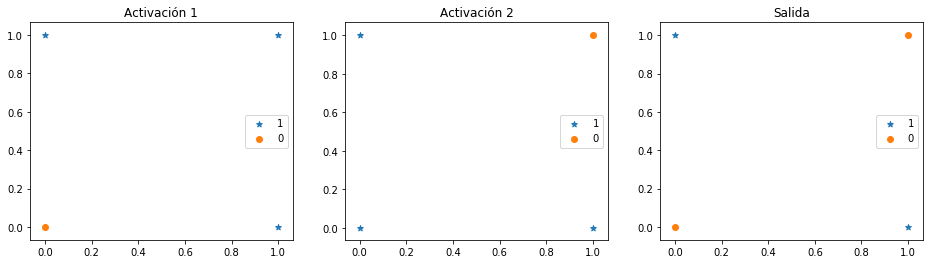

In [28]:
x1 = X[0, :]
x2 = X[1, :]

plt.figure(figsize=(16, 4))
plt.subplot(1,3,1)
Grafica(x1, x2, h[0, :])
plt.title("Activación 1")
plt.subplot(1,3,2)
Grafica(x1, x2, h[1, :])
plt.title("Activación 2")
plt.subplot(1,3,3)
Grafica(x1, x2, F_XOR(X).squeeze())
plt.title("Salida");